In [1]:
import util
import utilLinealRegression

Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


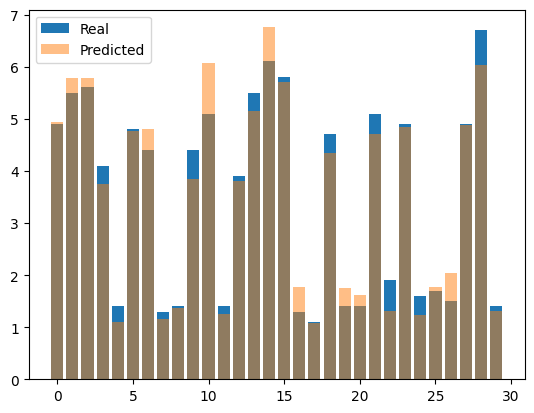

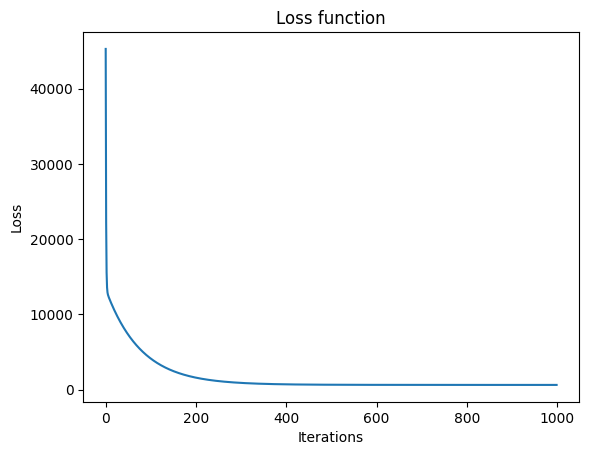

In [2]:
from sklearn.metrics import mean_squared_error
from util import *
from utilLinealRegression import gradient_descent, predict


def load_normalized_data_set():
    # usualmente para evitar realizar las normalizacion de los datos cada vez que se realiza entrenamiento de modelos
    # se guarda los datos normalizados, su media y desviacion estandar en un archivo
    # esto es util cuando el dataset es muy grande y la normalizacion (o preparación de datos) es costosa.
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

def load_raw_data_set():
    return load_iris_data()



def train_lineal_regression_model(study_case):
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # add column for the bias term (w0)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # train the model
    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    # predict y values
    y_pred = predict(x_test, weights)

    # print results
    print_resuts(y_test, y_pred)

    # plot prediction vs real values
    plot_real_vs_predicted(y_test, y_pred)

    # plot loss function
    plot_loss_function(history)

def study_case_1():
    # usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case=1)

def study_case_2():
    # usar los datos normalizados
    train_lineal_regression_model(study_case=2)


if __name__ == '__main__':
    study_case_1()
    # study_case_2()

Mean Squared Error MSE: 				0.143
Mean Squared Error MSE percentage: 		2.548%
Mean Absolute Percentage Error MAPE: 	11.009%


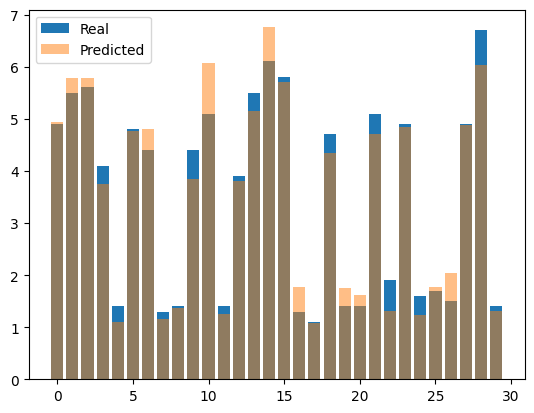

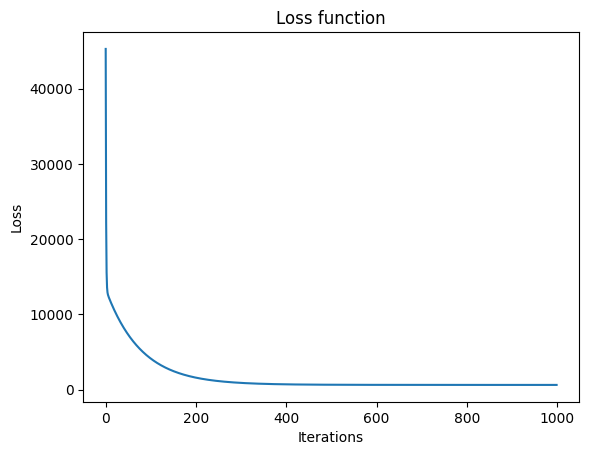

In [3]:
if __name__ == '__main__':
    study_case_1()
    # study_case_2()

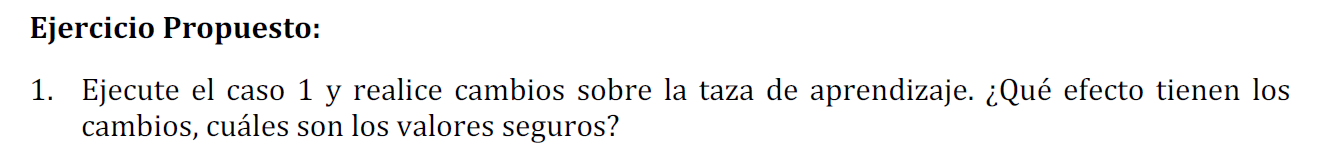

Evaluando tasa de aprendizaje: 0.0001
Evaluando tasa de aprendizaje: 0.001
Evaluando tasa de aprendizaje: 0.005
Evaluando tasa de aprendizaje: 0.01
Evaluando tasa de aprendizaje: 0.03
Evaluando tasa de aprendizaje: 0.04
Evaluando tasa de aprendizaje: 0.042
Evaluando tasa de aprendizaje: 0.04268


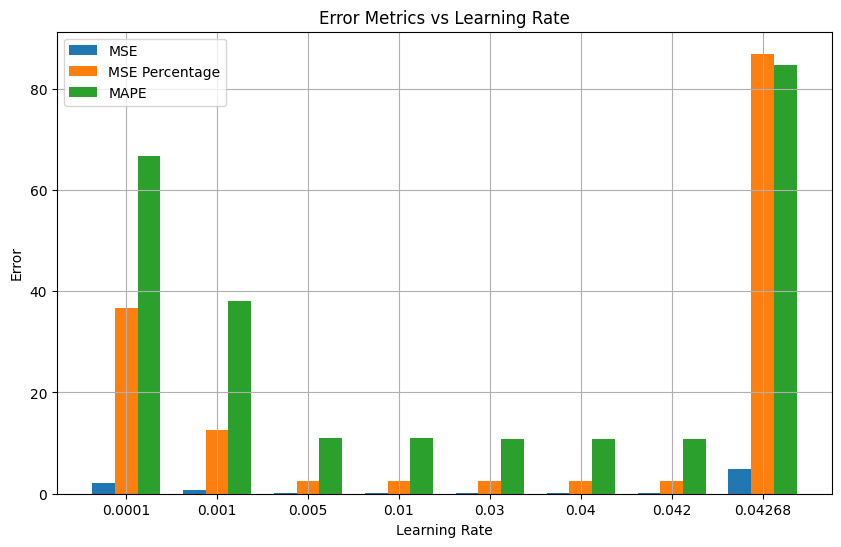

,learning_rate,MSE,MSE_percentage,MAPE
0,0.00010,2.051246,36.629387,66.724867
1,0.00100,0.699930,12.498756,38.140409
2,0.00500,0.140043,2.500760,10.914475
3,0.01000,0.142686,2.547971,11.008736
4,0.03000,0.141240,2.522139,10.851096
5,0.04000,0.141125,2.520081,10.840872
6,0.04200,0.141121,2.520014,10.840874
7,0.04268,4.866952,86.909862,84.607093


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar los datos del conjunto Iris
def load_raw_data_set():
    iris = load_iris()
    x = iris.data[:, [0, 1, 3]]  # Usamos tres características (Sepal Length, Sepal Width, Petal Width)
    y = iris.data[:, 2]  # Usamos Petal Length como la variable a predecir
    return x, y

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Descenso de gradiente para ajustar los pesos del modelo
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Inicializar pesos en ceros
    m = len(y)
    history = dict(cost=[], weights=[])
    
    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights = weights - learning_rate * gradients
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        
    return weights, history

# Función para entrenar el modelo de regresión lineal con una tasa de aprendizaje variable
def train_lineal_regression_model(study_case, learning_rate):
    # Cargar los datos según el caso de estudio
    if study_case == 1:
        x, y = load_raw_data_set()

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # Añadir columna de sesgo (bias term) a los datos
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo usando descenso de gradiente
    weights, history = gradient_descent(x_train, y_train, learning_rate=learning_rate, iterations=1000)

    # Predecir los valores de y
    y_pred = predict(x_test, weights)

    # Calcular métricas de error
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    # Retornar las métricas
    return mse, mse_percentage, mape

# Función para evaluar múltiples tasas de aprendizaje y guardar los resultados en un DataFrame
def evaluate_learning_rates(study_case, learning_rates):
    results = []
    
    for lr in learning_rates:
        print(f"Evaluando tasa de aprendizaje: {lr}")
        mse, mse_percentage, mape = train_lineal_regression_model(study_case, learning_rate=lr)

        # Guardar las métricas en una lista de resultados
        results.append({
            'learning_rate': lr,
            'MSE': mse,
            'MSE_percentage': mse_percentage,
            'MAPE': mape
        })

    # Convertir los resultados a un DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Función principal para ejecutar los casos de estudio
def study_case_with_varied_learning_rates():
    learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.03, 0.04, 0.042, 0.04268]  # Diferentes tasas de aprendizaje
    results_df = evaluate_learning_rates(study_case=1, learning_rates=learning_rates)

    # Guardar los resultados en un archivo CSV
    results_df.to_csv("learning_rate_results.csv", index=False)

    # Graficar los resultados de MSE y MAPE con respecto a las tasas de aprendizaje en gráfico de barras
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    index = np.arange(len(results_df['learning_rate']))

    # Gráfico de barras para MSE, MSE_percentage y MAPE
    plt.bar(index, results_df['MSE'], bar_width, label="MSE")
    plt.bar(index + bar_width, results_df['MSE_percentage'], bar_width, label="MSE Percentage")
    plt.bar(index + 2 * bar_width, results_df['MAPE'], bar_width, label="MAPE")

    plt.xlabel("Learning Rate")
    plt.ylabel("Error")
    plt.title("Error Metrics vs Learning Rate")
    plt.xticks(index + bar_width, results_df['learning_rate'])
    plt.legend()
    plt.grid(True)
    plt.show()
    return results_df

# Ejecutar el caso de estudio con tasas de aprendizaje variadas
study_case_with_varied_learning_rates()


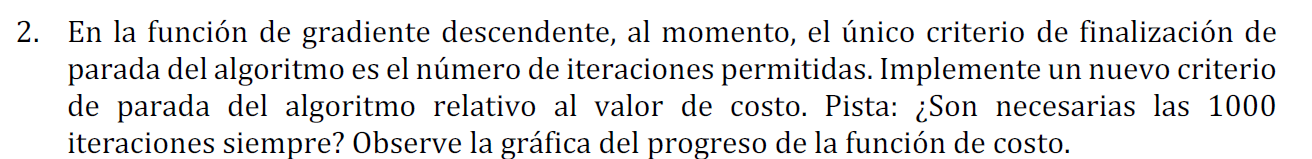

Convergencia alcanzada en la iteración 396. Costo: 726.2378100505329
MSE: 0.14321071969208188, MSE Percentage: 2.557334280215748, MAPE: 11.494013730367628


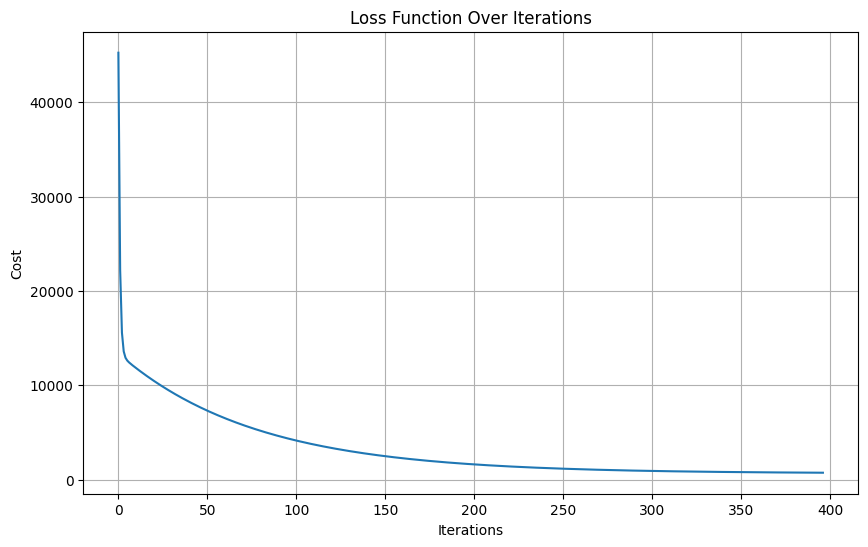

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pickle
import os

# Definir rutas
data_path = 'data'  # Usar una carpeta 'data' en el directorio actual
if not os.path.exists(data_path):
    os.makedirs(data_path)

normalized_file = os.path.join(data_path, 'normalized_data.pkl')

def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0, 1, 3]]  # Sepal Length, Sepal Width, Petal Width
    y = iris.data[:, 2]  # Petal Length
    return x, y

def load_and_save_normalized_data_set():
    x, y = load_iris_data()
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    std_x = x.std(axis=0)
    std_y = y.std()

    x = (x - x_mean) / std_x
    y = (y - y_mean) / std_y

    data = dict(x=x, y=y, x_mean=x_mean, y_mean=y_mean, std_x=std_x, std_y=std_y)
    with open(normalized_file, 'wb') as f:
        pickle.dump(data, f)

    return data

def load_normalized_data_set():
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

def read_normalized_data():
    with open(normalized_file, 'rb') as f:
        data = pickle.load(f)
        return data

def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

def predict(x, weights):
    return np.dot(x, weights)

def gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Caso de estudio 1
    m = len(y)
    history = dict(cost=[], weights=[])

    previous_cost = float('inf')

    for i in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = loss_function(y, predict(x, weights))

        history['cost'].append(cost)
        history['weights'].append(weights)

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i}. Costo: {cost}")
            break

        previous_cost = cost

    return weights, history

def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

def plot_loss_function(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['cost'])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.grid(True)
    plt.show()

def train_lineal_regression_model(study_case):
    if study_case == 1:
        x, y = load_iris_data()  # Aquí llamamos directamente a la función
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    y_pred = predict(x_test, weights)
    mse, mse_percentage, mape = print_results(y_test, y_pred)

    # Graficar la función de pérdida
    plot_loss_function(history)  # Llamada a la función para graficar la función de pérdida

    return mse, mse_percentage, mape  # Retorna métricas para su uso posterior

def study_case_1():
    # Usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case=1)

def study_case_2():
    # Usar los datos normalizados
    train_lineal_regression_model(study_case=2)

if __name__ == '__main__':
    study_case_1()
    # study_case_2()  # Descomentar para ejecutar caso de estudio 2


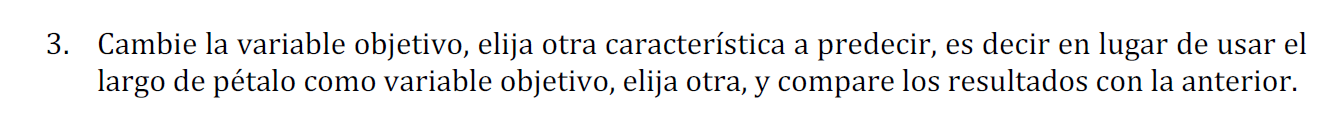

Convergencia alcanzada en la iteración 188. Costo: 899.495604654597
MSE: 0.10643510682506505, MSE Percentage: 5.601847727635001, MAPE: 8.132513401749957


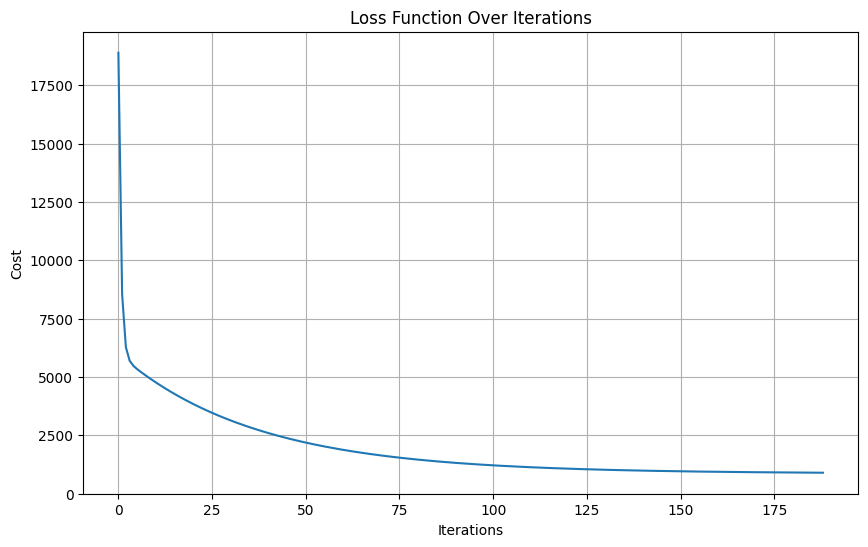

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pickle
import os

# Definir rutas
data_path = 'data'  # Usar una carpeta 'data' en el directorio actual
if not os.path.exists(data_path):
    os.makedirs(data_path)

normalized_file = os.path.join(data_path, 'normalized_data.pkl')

def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0,  3, 2]]  # Sepal Length,  Petal Width, Petal Length
    y = iris.data[:, 1]  # Sepal Width
    return x, y

def load_and_save_normalized_data_set():
    x, y = load_iris_data()
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    std_x = x.std(axis=0)
    std_y = y.std()

    x = (x - x_mean) / std_x
    y = (y - y_mean) / std_y

    data = dict(x=x, y=y, x_mean=x_mean, y_mean=y_mean, std_x=std_x, std_y=std_y)
    with open(normalized_file, 'wb') as f:
        pickle.dump(data, f)

    return data

def load_normalized_data_set():
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

def read_normalized_data():
    with open(normalized_file, 'rb') as f:
        data = pickle.load(f)
        return data

def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

def predict(x, weights):
    return np.dot(x, weights)

def gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Caso de estudio 1
    m = len(y)
    history = dict(cost=[], weights=[])

    previous_cost = float('inf')

    for i in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = loss_function(y, predict(x, weights))

        history['cost'].append(cost)
        history['weights'].append(weights)

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i}. Costo: {cost}")
            break

        previous_cost = cost

    return weights, history

def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

def plot_loss_function(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['cost'])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.grid(True)
    plt.show()

def train_lineal_regression_model(study_case):
    if study_case == 1:
        x, y = load_iris_data()  # Aquí llamamos directamente a la función
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    y_pred = predict(x_test, weights)
    mse, mse_percentage, mape = print_results(y_test, y_pred)

    # Graficar la función de pérdida
    plot_loss_function(history)  # Llamada a la función para graficar la función de pérdida

    return mse, mse_percentage, mape  # Retorna métricas para su uso posterior

def study_case_1():
    # Usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case=1)

def study_case_2():
    # Usar los datos normalizados
    train_lineal_regression_model(study_case=2)

if __name__ == '__main__':
    study_case_1()
    # study_case_2()  # Descomentar para ejecutar caso de estudio 2


Evaluando tasa de aprendizaje: 0.0001
Evaluando tasa de aprendizaje: 0.001
Evaluando tasa de aprendizaje: 0.005
Evaluando tasa de aprendizaje: 0.01
Evaluando tasa de aprendizaje: 0.03
Evaluando tasa de aprendizaje: 0.0368


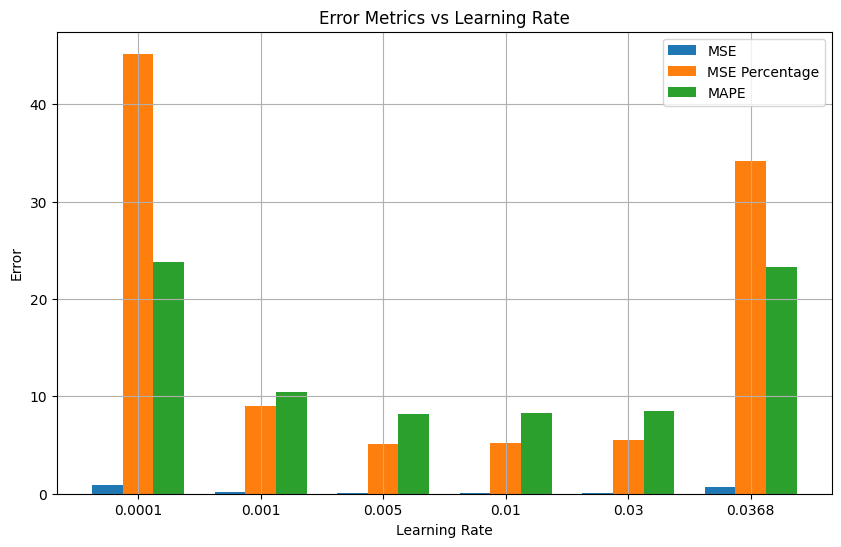

,learning_rate,MSE,MSE_percentage,MAPE
0,0.0001,0.858757,45.197712,23.790344
1,0.0010,0.171467,9.024581,10.466668
2,0.0050,0.097634,5.138617,8.208826
3,0.0100,0.098204,5.168655,8.264856
4,0.0300,0.104203,5.484365,8.527006
5,0.0368,0.648710,34.142657,23.293522


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar los datos del conjunto Iris
def load_raw_data_set():
    iris = load_iris()
    x = iris.data[:, [0, 2, 3]]  # Usamos tres características (Sepal Length, Sepal Width, Petal Width)
    y = iris.data[:, 1]  # Usamos Petal Length como la variable a predecir
    return x, y

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Descenso de gradiente para ajustar los pesos del modelo
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Inicializar pesos en ceros
    m = len(y)
    history = dict(cost=[], weights=[])
    
    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights = weights - learning_rate * gradients
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        
    return weights, history

# Función para entrenar el modelo de regresión lineal con una tasa de aprendizaje variable
def train_lineal_regression_model(study_case, learning_rate):
    # Cargar los datos según el caso de estudio
    if study_case == 1:
        x, y = load_raw_data_set()

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # Añadir columna de sesgo (bias term) a los datos
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo usando descenso de gradiente
    weights, history = gradient_descent(x_train, y_train, learning_rate=learning_rate, iterations=1000)

    # Predecir los valores de y
    y_pred = predict(x_test, weights)

    # Calcular métricas de error
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    # Retornar las métricas
    return mse, mse_percentage, mape

# Función para evaluar múltiples tasas de aprendizaje y guardar los resultados en un DataFrame
def evaluate_learning_rates(study_case, learning_rates):
    results = []
    
    for lr in learning_rates:
        print(f"Evaluando tasa de aprendizaje: {lr}")
        mse, mse_percentage, mape = train_lineal_regression_model(study_case, learning_rate=lr)

        # Guardar las métricas en una lista de resultados
        results.append({
            'learning_rate': lr,
            'MSE': mse,
            'MSE_percentage': mse_percentage,
            'MAPE': mape
        })

    # Convertir los resultados a un DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Función principal para ejecutar los casos de estudio
def study_case_with_varied_learning_rates():
    learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.03, 0.0368]  # Diferentes tasas de aprendizaje
    results_df = evaluate_learning_rates(study_case=1, learning_rates=learning_rates)

    # Guardar los resultados en un archivo CSV
    results_df.to_csv("learning_rate_results.csv", index=False)

    # Graficar los resultados de MSE y MAPE con respecto a las tasas de aprendizaje en gráfico de barras
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    index = np.arange(len(results_df['learning_rate']))

    # Gráfico de barras para MSE, MSE_percentage y MAPE
    plt.bar(index, results_df['MSE'], bar_width, label="MSE")
    plt.bar(index + bar_width, results_df['MSE_percentage'], bar_width, label="MSE Percentage")
    plt.bar(index + 2 * bar_width, results_df['MAPE'], bar_width, label="MAPE")

    plt.xlabel("Learning Rate")
    plt.ylabel("Error")
    plt.title("Error Metrics vs Learning Rate")
    plt.xticks(index + bar_width, results_df['learning_rate'])
    plt.legend()
    plt.grid(True)
    plt.show()
    return results_df

# Ejecutar el caso de estudio con tasas de aprendizaje variadas
study_case_with_varied_learning_rates()


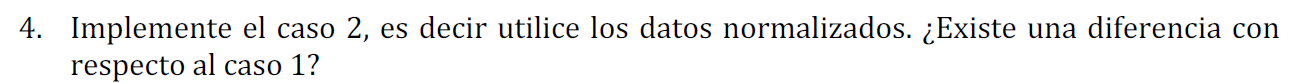

Convergencia alcanzada en la iteración 788. Costo: 4592.630166195267
MSE: 0.49248194555750757, MSE Percentage: 11.259976766415578, MAPE: 108.59134261667927


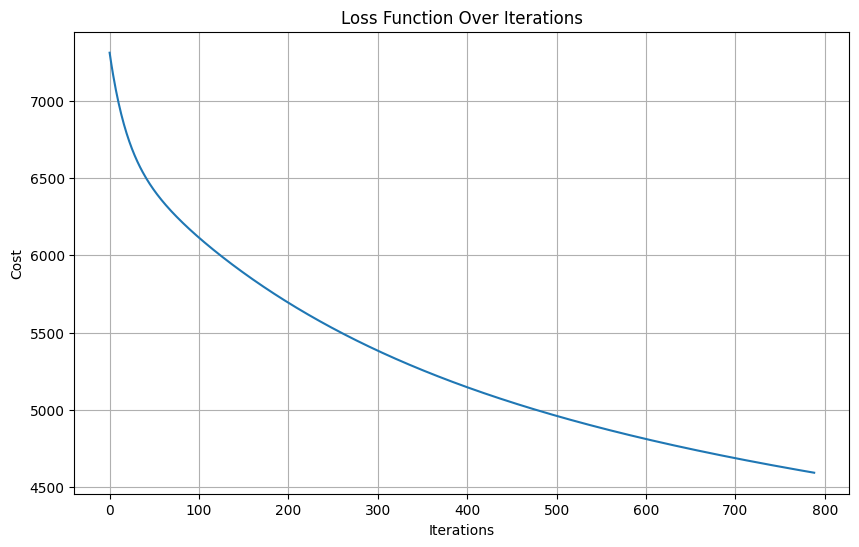

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pickle
import os

# Definir rutas
data_path = 'data'  # Usar una carpeta 'data' en el directorio actual
if not os.path.exists(data_path):
    os.makedirs(data_path)

normalized_file = os.path.join(data_path, 'normalized_data.pkl')

def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0,  3, 2]]  # Sepal Length,  Petal Width, Petal Length
    y = iris.data[:, 1]  # Sepal Width
    return x, y

def load_and_save_normalized_data_set():
    x, y = load_iris_data()
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    std_x = x.std(axis=0)
    std_y = y.std()

    x = (x - x_mean) / std_x
    y = (y - y_mean) / std_y

    data = dict(x=x, y=y, x_mean=x_mean, y_mean=y_mean, std_x=std_x, std_y=std_y)
    with open(normalized_file, 'wb') as f:
        pickle.dump(data, f)

    return data

def load_normalized_data_set():
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

def read_normalized_data():
    with open(normalized_file, 'rb') as f:
        data = pickle.load(f)
        return data

def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

def predict(x, weights):
    return np.dot(x, weights)

def gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Caso de estudio 1
    m = len(y)
    history = dict(cost=[], weights=[])

    previous_cost = float('inf')

    for i in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = loss_function(y, predict(x, weights))

        history['cost'].append(cost)
        history['weights'].append(weights)

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i}. Costo: {cost}")
            break

        previous_cost = cost

    return weights, history

def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

def plot_loss_function(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['cost'])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.grid(True)
    plt.show()

def train_lineal_regression_model(study_case):
    if study_case == 1:
        x, y = load_iris_data()  # Aquí llamamos directamente a la función
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    y_pred = predict(x_test, weights)
    mse, mse_percentage, mape = print_results(y_test, y_pred)

    # Graficar la función de pérdida
    plot_loss_function(history)  # Llamada a la función para graficar la función de pérdida

    return mse, mse_percentage, mape  # Retorna métricas para su uso posterior

def study_case_1():
    # Usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case=1)

def study_case_2():
    # Usar los datos normalizados
    train_lineal_regression_model(study_case=2)

if __name__ == '__main__':
    study_case_2()
    # study_case_2()  # Descomentar para ejecutar caso de estudio 2

Evaluando tasa de aprendizaje: 1e-05
Evaluando tasa de aprendizaje: 0.0001
Evaluando tasa de aprendizaje: 0.001
Evaluando tasa de aprendizaje: 0.005
Evaluando tasa de aprendizaje: 0.01
Evaluando tasa de aprendizaje: 0.03
Evaluando tasa de aprendizaje: 0.0368
Evaluando tasa de aprendizaje: 0.05
Evaluando tasa de aprendizaje: 0.07
Evaluando tasa de aprendizaje: 0.1


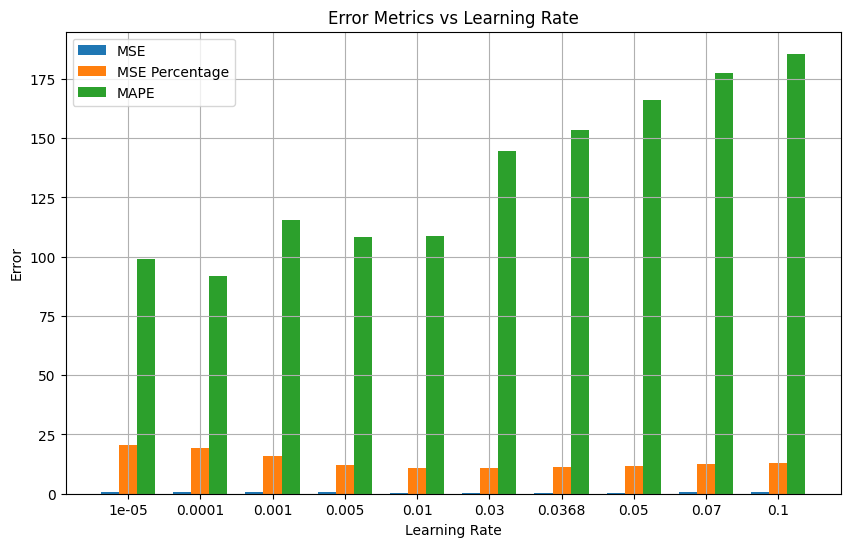

,learning_rate,MSE,MSE_percentage,MAPE
0,0.00001,0.908138,20.763425,99.112268
1,0.00010,0.852528,19.491969,91.946940
2,0.00100,0.691213,15.803717,115.679960
3,0.00500,0.530628,12.132131,108.473874
4,0.01000,0.479221,10.956773,108.528626
5,0.03000,0.480497,10.985963,144.740270
6,0.03680,0.491871,11.246018,153.589166
7,0.05000,0.513710,11.745321,166.137221
8,0.07000,0.539353,12.331617,177.577380
9,0.10000,0.560680,12.819247,185.636923


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle
import os

# Cargar los datos del conjunto Iris
def load_raw_data_set():
    iris = load_iris()
    x = iris.data[:, [0, 2, 3]]  # Usamos Sepal Length, Petal Width y Petal Length
    y = iris.data[:, 1]  # Usamos Sepal Width como la variable a predecir
    return x, y

# Función para normalizar los datos
def load_normalized_data_set():
    x, y = load_raw_data_set()
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    std_x = x.std(axis=0)
    std_y = y.std()

    x_normalized = (x - x_mean) / std_x
    y_normalized = (y - y_mean) / std_y

    return x_normalized, y_normalized

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Descenso de gradiente para ajustar los pesos del modelo
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Inicializar pesos en ceros
    m = len(y)
    history = dict(cost=[], weights=[])

    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights = weights - learning_rate * gradients
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)

    return weights, history

# Función para entrenar el modelo de regresión lineal con una tasa de aprendizaje variable
def train_lineal_regression_model(study_case, learning_rate):
    # Cargar los datos según el caso de estudio
    if study_case == 1:
        x, y = load_raw_data_set()
    else:
        x, y = load_normalized_data_set()  # Cargar datos normalizados

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # Añadir columna de sesgo (bias term) a los datos
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo usando descenso de gradiente
    weights, history = gradient_descent(x_train, y_train, learning_rate=learning_rate, iterations=1000)

    # Predecir los valores de y
    y_pred = predict(x_test, weights)

    # Calcular métricas de error
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    # Retornar las métricas
    return mse, mse_percentage, mape

# Función para evaluar múltiples tasas de aprendizaje y guardar los resultados en un DataFrame
def evaluate_learning_rates(study_case, learning_rates):
    results = []
    
    for lr in learning_rates:
        print(f"Evaluando tasa de aprendizaje: {lr}")
        mse, mse_percentage, mape = train_lineal_regression_model(study_case, learning_rate=lr)

        # Guardar las métricas en una lista de resultados
        results.append({
            'learning_rate': lr,
            'MSE': mse,
            'MSE_percentage': mse_percentage,
            'MAPE': mape
        })

    # Convertir los resultados a un DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Función principal para ejecutar los casos de estudio
def study_case_with_varied_learning_rates():
    learning_rates = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.03, 0.0368, 0.05, 0.07, 0.1]  # Diferentes tasas de aprendizaje
    results_df = evaluate_learning_rates(study_case=2, learning_rates=learning_rates)  # Usar caso de estudio 2

    # Guardar los resultados en un archivo CSV
    results_df.to_csv("learning_rate_results.csv", index=False)

    # Graficar los resultados de MSE y MAPE con respecto a las tasas de aprendizaje en gráfico de barras
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    index = np.arange(len(results_df['learning_rate']))

    # Gráfico de barras para MSE, MSE_percentage y MAPE
    plt.bar(index, results_df['MSE'], bar_width, label="MSE")
    plt.bar(index + bar_width, results_df['MSE_percentage'], bar_width, label="MSE Percentage")
    plt.bar(index + 2 * bar_width, results_df['MAPE'], bar_width, label="MAPE")

    plt.xlabel("Learning Rate")
    plt.ylabel("Error")
    plt.title("Error Metrics vs Learning Rate")
    plt.xticks(index + bar_width, results_df['learning_rate'])
    plt.legend()
    plt.grid(True)
    plt.show()
    return results_df
# Ejecutar el caso de estudio con tasas de aprendizaje variadas
study_case_with_varied_learning_rates()


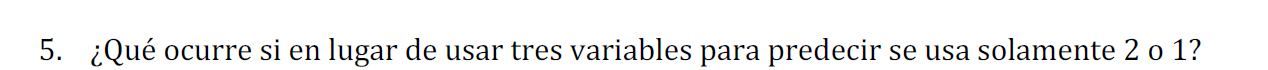

Convergencia alcanzada en la iteración 382. Costo: 1417.8284425628685
MSE: 0.19661021953326763, MSE Percentage: 8.936828160603074, MAPE: 118.38132475923236


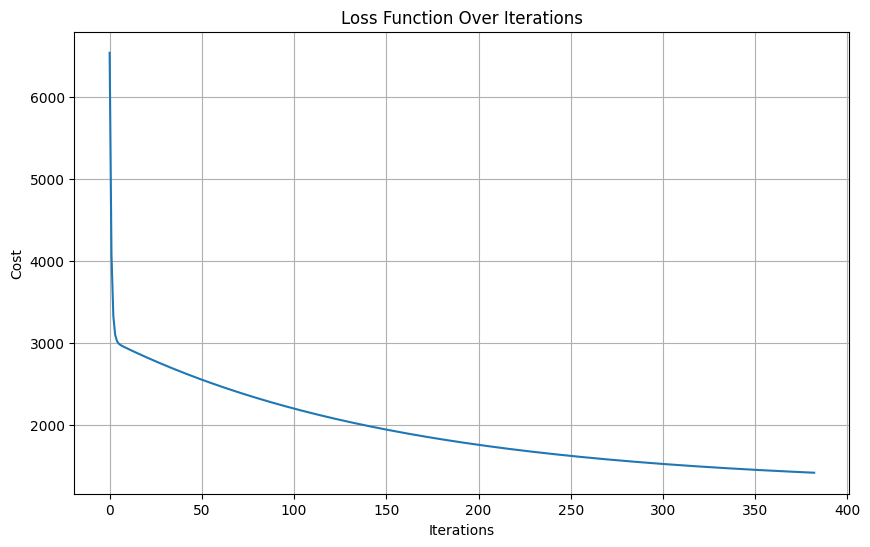

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import pickle
import os

# Definir rutas
data_path = 'data'  # Usar una carpeta 'data' en el directorio actual
if not os.path.exists(data_path):
    os.makedirs(data_path)

normalized_file = os.path.join(data_path, 'normalized_data.pkl')

def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0,  1]]  # Sepal Length,  Petal Width, Petal Length
    y = iris.data[:, 3]  # Sepal Width
    return x, y

def load_and_save_normalized_data_set():
    x, y = load_iris_data()
    x_mean = x.mean(axis=0)
    y_mean = y.mean()
    std_x = x.std(axis=0)
    std_y = y.std()

    x = (x - x_mean) / std_x
    y = (y - y_mean) / std_y

    data = dict(x=x, y=y, x_mean=x_mean, y_mean=y_mean, std_x=std_x, std_y=std_y)
    with open(normalized_file, 'wb') as f:
        pickle.dump(data, f)

    return data

def load_normalized_data_set():
    if not os.path.exists(normalized_file):
        return load_and_save_normalized_data_set()
    return read_normalized_data()

def read_normalized_data():
    with open(normalized_file, 'rb') as f:
        data = pickle.load(f)
        return data

def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

def predict(x, weights):
    return np.dot(x, weights)

def gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Caso de estudio 1
    m = len(y)
    history = dict(cost=[], weights=[])

    previous_cost = float('inf')

    for i in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights -= learning_rate * gradients
        cost = loss_function(y, predict(x, weights))

        history['cost'].append(cost)
        history['weights'].append(weights)

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i}. Costo: {cost}")
            break

        previous_cost = cost

    return weights, history

def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

def plot_loss_function(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['cost'])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.grid(True)
    plt.show()

def train_lineal_regression_model(study_case):
    if study_case == 1:
        x, y = load_iris_data()  # Aquí llamamos directamente a la función
    else:
        data = load_normalized_data_set()
        x = data['x']
        y = data['y']

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    y_pred = predict(x_test, weights)
    mse, mse_percentage, mape = print_results(y_test, y_pred)

    # Graficar la función de pérdida
    plot_loss_function(history)  # Llamada a la función para graficar la función de pérdida

    return mse, mse_percentage, mape  # Retorna métricas para su uso posterior

def study_case_1():
    # Usar los datos crudos sin normalizar
    train_lineal_regression_model(study_case=1)

def study_case_2():
    # Usar los datos normalizados
    train_lineal_regression_model(study_case=2)

if __name__ == '__main__':
    study_case_1()
    # study_case_2()  # Descomentar para ejecutar caso de estudio 2

Evaluando tasa de aprendizaje: 0.0001
Evaluando tasa de aprendizaje: 0.001
Evaluando tasa de aprendizaje: 0.005
Evaluando tasa de aprendizaje: 0.01
Evaluando tasa de aprendizaje: 0.03
Evaluando tasa de aprendizaje: 0.04
Evaluando tasa de aprendizaje: 0.04425


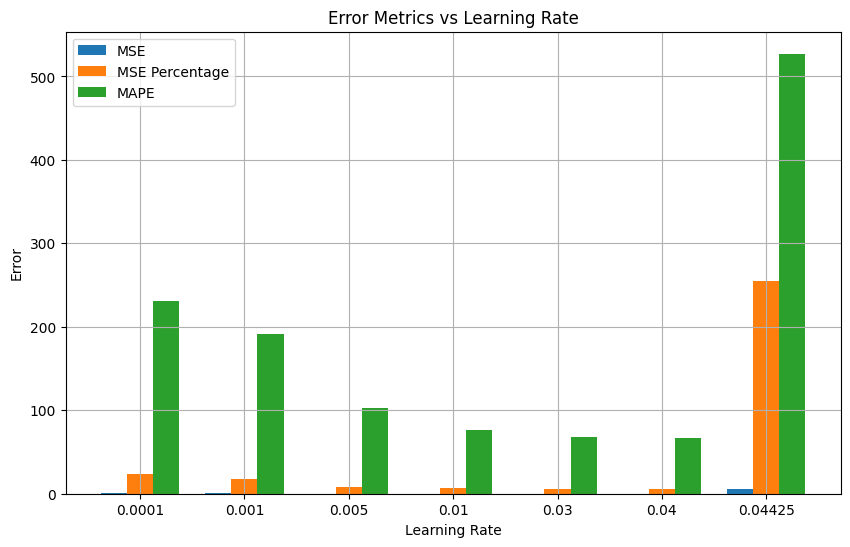

,learning_rate,MSE,MSE_percentage,MAPE
0,0.00010,0.531034,24.137928,230.315902
1,0.00100,0.382036,17.365268,191.173482
2,0.00500,0.171281,7.785489,103.198489
3,0.01000,0.137754,6.261547,76.206137
4,0.03000,0.128127,5.823967,67.757720
5,0.04000,0.126666,5.757530,66.896468
6,0.04425,5.610766,255.034796,527.172394


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar los datos del conjunto Iris
def load_raw_data_set():
    iris = load_iris()
    x = iris.data[:, [0, 1]]  # Usamos tres características (Sepal Length, Sepal Width, Petal Width)
    y = iris.data[:, 3]  # Usamos Petal Length como la variable a predecir
    return x, y

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Descenso de gradiente para ajustar los pesos del modelo
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, seed=123):
    np.random.seed(seed)
    weights = np.zeros(x.shape[1])  # Inicializar pesos en ceros
    m = len(y)
    history = dict(cost=[], weights=[])
    
    for _ in range(iterations):
        gradients = np.dot(x.T, (np.dot(x, weights) - y)) / m
        weights = weights - learning_rate * gradients
        cost = loss_function(y, predict(x, weights))
        history['cost'].append(cost)
        history['weights'].append(weights)
        
    return weights, history

# Función para entrenar el modelo de regresión lineal con una tasa de aprendizaje variable
def train_lineal_regression_model(study_case, learning_rate):
    # Cargar los datos según el caso de estudio
    if study_case == 1:
        x, y = load_raw_data_set()

    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)

    # Añadir columna de sesgo (bias term) a los datos
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Entrenar el modelo usando descenso de gradiente
    weights, history = gradient_descent(x_train, y_train, learning_rate=learning_rate, iterations=1000)

    # Predecir los valores de y
    y_pred = predict(x_test, weights)

    # Calcular métricas de error
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    # Retornar las métricas
    return mse, mse_percentage, mape

# Función para evaluar múltiples tasas de aprendizaje y guardar los resultados en un DataFrame
def evaluate_learning_rates(study_case, learning_rates):
    results = []
    
    for lr in learning_rates:
        print(f"Evaluando tasa de aprendizaje: {lr}")
        mse, mse_percentage, mape = train_lineal_regression_model(study_case, learning_rate=lr)

        # Guardar las métricas en una lista de resultados
        results.append({
            'learning_rate': lr,
            'MSE': mse,
            'MSE_percentage': mse_percentage,
            'MAPE': mape
        })

    # Convertir los resultados a un DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Función principal para ejecutar los casos de estudio
def study_case_with_varied_learning_rates():
    learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.03, 0.04, 0.04425]  # Diferentes tasas de aprendizaje
    results_df = evaluate_learning_rates(study_case=1, learning_rates=learning_rates)

    # Guardar los resultados en un archivo CSV
    results_df.to_csv("learning_rate_results.csv", index=False)

    # Graficar los resultados de MSE y MAPE con respecto a las tasas de aprendizaje en gráfico de barras
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    index = np.arange(len(results_df['learning_rate']))

    # Gráfico de barras para MSE, MSE_percentage y MAPE
    plt.bar(index, results_df['MSE'], bar_width, label="MSE")
    plt.bar(index + bar_width, results_df['MSE_percentage'], bar_width, label="MSE Percentage")
    plt.bar(index + 2 * bar_width, results_df['MAPE'], bar_width, label="MAPE")

    plt.xlabel("Learning Rate")
    plt.ylabel("Error")
    plt.title("Error Metrics vs Learning Rate")
    plt.xticks(index + bar_width, results_df['learning_rate'])
    plt.legend()
    plt.grid(True)
    plt.show()
    return results_df

# Ejecutar el caso de estudio con tasas de aprendizaje variadas
study_case_with_varied_learning_rates()


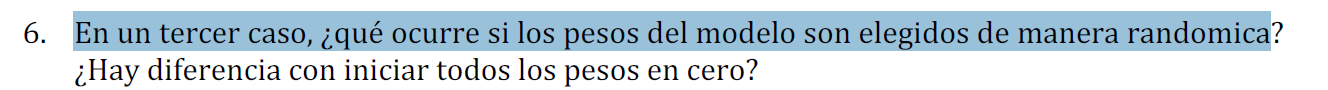

Convergencia alcanzada en la iteración 86. Costo: 369.6134052256316
MSE: 0.05377821408198443, MSE Percentage: 2.444464276453838, MAPE: 47.36996218326042


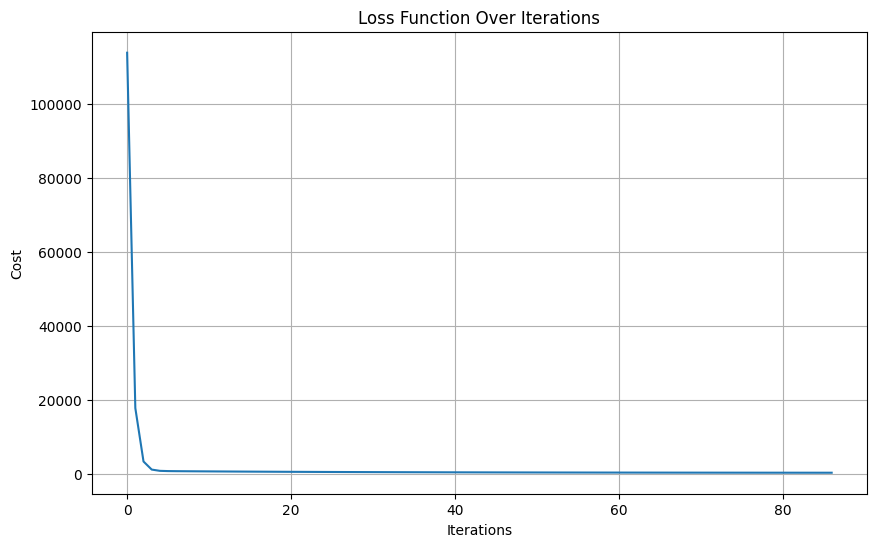

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Función para cargar los datos del conjunto Iris
def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0, 1,2]]  # Sepal Length, Petal Width, Petal Length
    y = iris.data[:, 3]  # Sepal Width
    return x, y

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Descenso de gradiente para ajustar los pesos del modelo
# Descenso de gradiente para ajustar los pesos del modelo
def gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)  # Establecer semilla para reproducibilidad
    m = len(y)
    weights = np.random.rand(x.shape[1])  # Inicializar pesos de manera aleatoria
    history = {'cost': [], 'weights': []}

    previous_cost = float('inf')

    for i in range(iterations):
        y_hat = predict(x, weights)
        cost = loss_function(y, y_hat)
        history['cost'].append(cost)
        history['weights'].append(weights.copy())  # Guardar una copia de los pesos

        # Calcular gradientes
        gradients = np.dot(x.T, (y_hat - y)) / m
        weights -= learning_rate * gradients

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i}. Costo: {cost}")
            break

        previous_cost = cost

    return weights, history


# Función para imprimir resultados
def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

# Función para graficar la función de costo
def plot_loss_function(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['cost'])
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.grid(True)
    plt.show()

# Función principal para entrenar el modelo de regresión lineal
def train_linear_regression_model():
    x, y = load_iris_data()  # Cargar datos del conjunto Iris
    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]  # Agregar término de sesgo
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    weights, history = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

    # Predecir los valores de y
    y_pred = predict(x_test, weights)
    mse, mse_percentage, mape = print_results(y_test, y_pred)

    # Graficar la función de costo
    plot_loss_function(history)

if __name__ == '__main__':
    train_linear_regression_model()


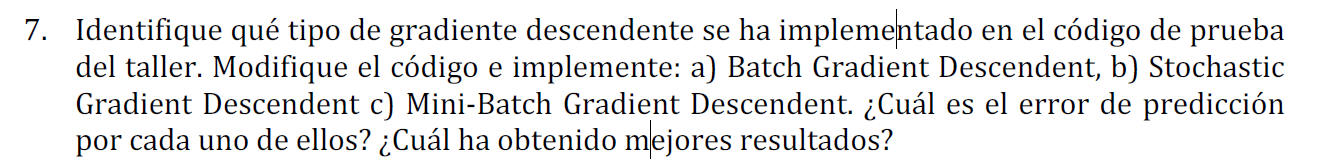

Convergencia alcanzada en la iteración 86 (Batch). Costo: 369.6134052256316
Resultados Batch Gradient Descent:
MSE: 0.05377821408198443, MSE Percentage: 2.444464276453838, MAPE: 47.36996218326042
Convergencia alcanzada en la iteración 115 (Stochastic). Costo: 613.6870858623727
Resultados Stochastic Gradient Descent:
MSE: 0.09055079454293759, MSE Percentage: 4.115945206497164, MAPE: 71.64846451813555
Convergencia alcanzada en la iteración 17 (Mini-Batch). Costo: 347.3874543627879
Límite de iteraciones alcanzado (Mini-Batch). Costo final: 347.3874543627879
Resultados Mini-Batch Gradient Descent:
MSE: 0.047030849220485026, MSE Percentage: 2.1377658736584104, MAPE: 41.182885143432905


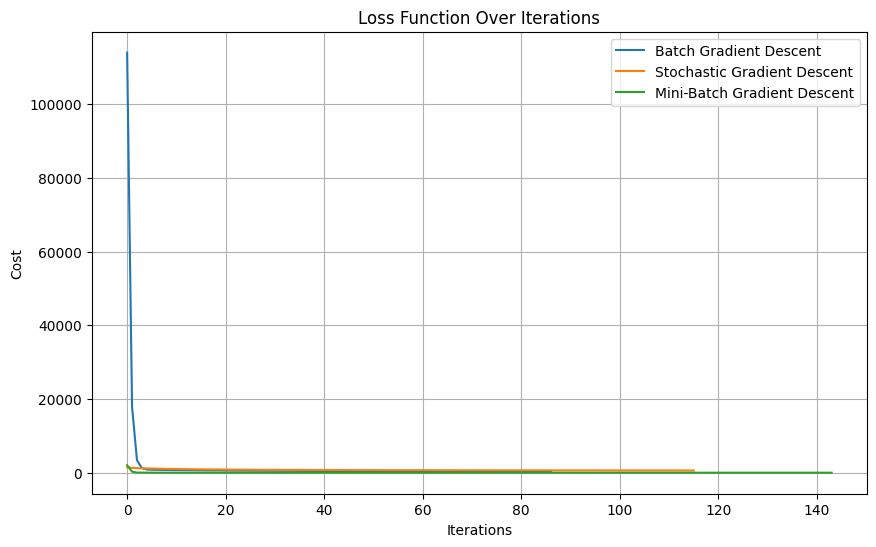

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Función para cargar los datos del conjunto Iris
def load_iris_data():
    iris = load_iris()
    x = iris.data[:, [0, 1, 2]]  # Sepal Length, Petal Width, Petal Length
    y = iris.data[:, 3]  # Sepal Width
    return x, y

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def split_train_and_test(x, y, test_size=0.2, seed=123):
    return train_test_split(x, y, test_size=test_size, random_state=seed)

# Función de pérdida: Mean Squared Error (MSE)
def loss_function(y, y_hat):
    return (1 / 2 * len(y)) * np.sum((y - y_hat) ** 2)

# Función para predecir usando los pesos del modelo
def predict(x, weights):
    return np.dot(x, weights)

# Batch Gradient Descent
def batch_gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    m = len(y)
    weights = np.random.rand(x.shape[1])
    history = {'cost': []}

    previous_cost = float('inf')

    for i in range(iterations):
        y_hat = predict(x, weights)
        cost = loss_function(y, y_hat)
        history['cost'].append(cost)

        # Calcular gradientes
        gradients = np.dot(x.T, (y_hat - y)) / m
        weights -= learning_rate * gradients

        # Criterio de parada
        if abs(previous_cost - cost) < tol:
            print(f"Convergencia alcanzada en la iteración {i} (Batch). Costo: {cost}")
            break

        previous_cost = cost

    return weights, history

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, learning_rate=0.01, iterations=1000, tol=1, seed=123):
    np.random.seed(seed)
    m = len(y)
    weights = np.random.rand(x.shape[1])
    history = {'cost': []}

    previous_cost = float('inf')

    for i in range(iterations):
        for j in range(m):
            # Calcular la predicción y el costo para el ejemplo j
            y_hat = predict(x[j:j+1], weights)
            # Calcular gradientes
            gradients = (y_hat - y[j:j+1]) * x[j:j+1].flatten()
            weights -= learning_rate * gradients

        # Calcular el costo promedio después de una iteración completa
        y_hat_all = predict(x, weights)
        cost_avg = loss_function(y, y_hat_all)
        history['cost'].append(cost_avg)  # Guardar el costo promedio

        # Criterio de parada
        if abs(previous_cost - cost_avg) < tol:
            print(f"Convergencia alcanzada en la iteración {i} (Stochastic). Costo: {cost_avg}")
            break

        previous_cost = cost_avg

    return weights, history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, learning_rate=0.001, iterations=1000, batch_size=16, tol=1, seed=123):
    np.random.seed(seed)
    m = len(y)
    weights = np.random.rand(x.shape[1])
    history = {'cost': []}

    previous_cost = float('inf')

    for i in range(iterations):
        indices = np.random.permutation(m)  # Barajar índices
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            x_batch = x_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            y_hat = predict(x_batch, weights)
            cost = loss_function(y_batch, y_hat)
            history['cost'].append(cost)

            # Calcular gradientes
            gradients = np.dot(x_batch.T, (y_hat - y_batch)) / batch_size
            weights -= learning_rate * gradients

        # Calcular el costo promedio para el conjunto
        y_hat_all = predict(x, weights)
        cost_avg = loss_function(y, y_hat_all)

        # Criterio de parada
        if abs(previous_cost - cost_avg) < tol:
            print(f"Convergencia alcanzada en la iteración {i} (Mini-Batch). Costo: {cost_avg}")
            break

        previous_cost = cost_avg
        
    print(f"Límite de iteraciones alcanzado (Mini-Batch). Costo final: {cost_avg}")

    return weights, history

# Función para imprimir resultados
def print_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mse_percentage = (mse / (np.max(y_test) - np.min(y_test))) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"MSE: {mse}, MSE Percentage: {mse_percentage}, MAPE: {mape}")
    return mse, mse_percentage, mape

# Función para graficar la función de costo
def plot_loss_function(history, label):
    plt.plot(history['cost'], label=label)

# Función principal para entrenar el modelo de regresión lineal
def train_linear_regression_model():
    x, y = load_iris_data()  # Cargar datos del conjunto Iris
    x_train, x_test, y_train, y_test = split_train_and_test(x, y, 0.2)
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]  # Agregar término de sesgo
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]

    # Batch Gradient Descent
    weights_bgd, history_bgd = batch_gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)
    y_pred_bgd = predict(x_test, weights_bgd)
    print("Resultados Batch Gradient Descent:")
    print_results(y_test, y_pred_bgd)
    
    # Stochastic Gradient Descent
    weights_sgd, history_sgd = stochastic_gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)
    y_pred_sgd = predict(x_test, weights_sgd)
    print("Resultados Stochastic Gradient Descent:")
    print_results(y_test, y_pred_sgd)

    # Mini-Batch Gradient Descent
    weights_mbgd, history_mbgd = mini_batch_gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000, batch_size=16)
    y_pred_mbgd = predict(x_test, weights_mbgd)
    print("Resultados Mini-Batch Gradient Descent:")
    print_results(y_test, y_pred_mbgd)

    # Graficar la función de costo
    plt.figure(figsize=(10, 6))
    plot_loss_function(history_bgd, label='Batch Gradient Descent')
    plot_loss_function(history_sgd, label='Stochastic Gradient Descent')
    plot_loss_function(history_mbgd, label='Mini-Batch Gradient Descent')
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Function Over Iterations")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    train_linear_regression_model()
